In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
import plotly.express as px

# Setting pandas to display columns
pd.set_option('display.max_columns', None)

In [37]:
nfl_small2_end_of_drive = pd.read_csv('nfl_small_end_of_drive.csv',index_col=1,\
    dtype= {'ARI' : 'str','ATL' : 'str', 'BAL' : 'str', 'BUF' : 'str', 'CAR' : 'str',
             'CHI' : 'str', 'CIN' : 'str', 'CLE' : 'str', 'DAL' : 'str', 'DEN' : 'str',
             'DET' : 'str', 'GB' : 'str', 'HOU' : 'str', 'IND' : 'str', 'JAX' : 'str',
             'KC' : 'str', 'LA' : 'str', 'LAC' : 'str', 'MIA' : 'str', 'MIN' : 'str',
             'NE' : 'str', 'NO' : 'str', 'NYG' : 'str','NYJ' : 'str', 'OAK' : 'str',
             'PHI' : 'str', 'PIT' : 'str','SEA' : 'str', 'SF' : 'str', 'TB' : 'str',
             'TEN' : 'str', 'WAS' : 'str'})


In [38]:
nfl_small2_end_of_drive.head()

,index,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,year,diff,Estimated_Time,Estimated Time (EST),Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Unnamed: 0_y,Wind Direction (deg),Wind Speed (km/h),added_time,game_name,end_of_drive,end_of_game,INT,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAX,KC,LA,LAC,MIA,MIN,NE,NO,NYG,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WAS,week
play_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36,270409,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,NE,35.0,1,0,NaN,0.0,NE 35,0,0,S.Gostkowski kicks 65 yards from NE 35 to end ...,kickoff,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
51,270410,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,80.0,1,0,1.0,0.0,PIT 20,10,18,(15:00) De.Williams right tackle to PIT 38 for...,run,18.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
72,270411,2015091000,2015-09-10 00:00:00,14:21,861.0,1761.0,3561.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,62.0,1,0,1.0,0.0,PIT 38,10,31,(14:21) B.Roethlisberger pass short right to A...,pass,9.0,short,-4.0,13.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-09-10 20:40:00,2015.0,0 days 00:01:57.000000000,2015-09-10 20:41:57,2015-09-10 20:41:57,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
101,270412,2015091000,2015-09-10 00:00:00,14:04,844.0,1744.0,3544.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,53.0,1,0,2.0,0.0,PIT 47,1,31,(14:04) De.Williams right guard to NE 49 for 4...,run,4.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:02:48.000000000,2015-09-10 20:42:48,2015-09-10 20:42:48,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
122,270413,2015091000,2015-09-10 00:00:00,13:26,806.0,1706.0,3506.0,Half1,0,1,NE,PIT,PIT,away,NE,NE,49.0,1,0,1.0,0.0,NE 49,10,45,(13:26) B.Roethlisberger pass short right to H...,pass,14.0,short,9.0,5.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-09-10 20:40:00,2015.0,0 days 00:04:42.000000000,2015-09-10 20:44:42,2015-09-10 20:44:42,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-0

In [39]:
# Getting teams to add team matrix for easier filtering
teams = list(nfl_small2_end_of_drive.groupby('posteam').sum().index)
teams[:4]

['ARI', 'ATL', 'BAL', 'BUF']

In [40]:
nfl_small2_end_of_drive.year.unique()

array([2015., 2016., 2017., 2018.])

In [41]:
# Creating Home and Away Win Columns
nfl_small2_end_of_drive['home_team_win'] = np.where(nfl_small2_end_of_drive['total_home_score']\
                              > nfl_small2_end_of_drive['total_away_score'],1,0)

nfl_small2_end_of_drive['away_team_win'] = np.where(nfl_small2_end_of_drive['total_home_score']\
                              < nfl_small2_end_of_drive['total_away_score'],1,0)

In [42]:
sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2015) &\
                                            (nfl_small2_end_of_drive['CLE'] == 'H')
                                           ]['home_team_win'])

2

In [43]:
# Team wins overall for sorting
team_wins_overall = []
years = [2015,2016,2017,2018]
year_list = []
team_list = []

for team in teams:
    for year in years:
        home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'H')
                                               ]['home_team_win'])

        away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'A')
                                               ]['away_team_win'])

        # Due to lack of data, normalizing 2018 to 16 week season
        if year == 2018:
            all_wins = np.round((home_wins + away_wins) * 16/14,0)
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)
            
        else:
            all_wins = home_wins + away_wins
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)

team_by_wins = pd.DataFrame({'team':team_list,'wins':team_wins_overall,'year':year_list}).sort_values(by=['wins'])

In [44]:
team_win_list = list(team_by_wins.groupby('team').agg({'wins':'sum'}).sort_values(by=['wins']).index)

In [45]:
# Team wins overall for sorting
team_wins_overall = []
years = [2015,2016,2017,2018]
year_list = []
team_list = []

for team in team_win_list:
    for year in years:
        home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'H')
                                               ]['home_team_win'])

        away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'A')
                                               ]['away_team_win'])

        # Due to lack of data, normalizing 2018 to 16 week season
        if year == 2018:
            all_wins = np.round((home_wins + away_wins) * 16/14,0)
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)
            
        else:
            all_wins = home_wins + away_wins
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)

team_by_wins = pd.DataFrame({'team':team_list,'wins':team_wins_overall,'year':year_list})

In [46]:
# Could change this to mathematical bins
# bins = [0, 7, 10, 17]
labels = ['5 or Less', 'Between 6 and 9','10+ Wins']
team_by_wins['binned'] = pd.cut(team_by_wins['wins'], bins=3, labels=labels)

team_by_wins

,team,wins,year,binned
0,CLE,3.0,2015,5 or Less
1,CLE,1.0,2016,5 or Less
2,CLE,0.0,2017,5 or Less
3,CLE,7.0,2018,Between 6 and 9
4,SF,5.0,2015,5 or Less
...,...,...,...,...
123,KC,13.0,2018,10+ Wins
124,NE,12.0,2015,10+ Wins
125,NE,14.0,2016,10+ Wins
126,NE,13.0,2017,10+ Wins


In [47]:
team_by_wins.wins.describe() #.plot(kind='hist',bins=3)

count    128.000000
mean       7.960938
std        3.038862
min        0.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       15.000000
Name: wins, dtype: float64

In [48]:
fig = go.Figure(data=[go.Bar(name='Total', x = team_by_wins['team'], y = team_by_wins['wins'])])

layout = go.Layout(
    title = 'Total Wins By Team (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Team'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

For the four years from 2015 thru 2018, we can naturally break teams into groups of successfulness, start with our top 7. Then we have quite a few middle of the pack teams, and an obvious group of bottom dwellers. One of our team member's favorite being the Cleveland Browns...

In [49]:
# Team wins by year
team_wins_2015 = []
teams = list(team_by_wins['team'].unique())
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2015) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2015) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = home_wins + away_wins
    
    team_wins_2015.append(round(all_wins,0))


team_wins_2016 = []
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2016) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2016) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = home_wins + away_wins
    
    team_wins_2016.append(round(all_wins,0))

team_wins_2017 = []
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2017) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2017) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = home_wins + away_wins
    
    team_wins_2017.append(round(all_wins,0))
    
team_wins_2018 = []
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2018) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2018) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = (home_wins + away_wins)*16/14
    
    team_wins_2018.append(round(all_wins,0))

In [50]:
fig = go.Figure(data=[go.Bar(name='2015', x = teams, y = team_wins_2015),\
                      go.Bar(name='2016', x = teams, y = team_wins_2016),\
                      go.Bar(name='2017', x = teams, y = team_wins_2017),\
                      go.Bar(name='2018', x = teams, y = team_wins_2018)])

layout = go.Layout(
    title = 'Total Wins By Year (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
    
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Year'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        barmode='group',width=1000, height=600)
fig

We see mostly steady win totals, but not some teams have over or underpreformed. We are assuming Total Wins over a four year period is indicative of how good a team is.

-Needs to be corrected for proper win totals?   
-Needs dividers between teams?

In [51]:
team_by_wins.head()

,team,wins,year,binned
0,CLE,3.0,2015,5 or Less
1,CLE,1.0,2016,5 or Less
2,CLE,0.0,2017,5 or Less
3,CLE,7.0,2018,Between 6 and 9
4,SF,5.0,2015,5 or Less


In [52]:
x2015 = team_by_wins[team_by_wins['year']==2015].groupby('binned').count().index
y2015 = team_by_wins[team_by_wins['year']==2015].groupby('binned').count()['team'].values

x2016 = team_by_wins[team_by_wins['year']==2016].groupby('binned').count().index
y2016 = team_by_wins[team_by_wins['year']==2016].groupby('binned').count()['team'].values

x2017 = team_by_wins[team_by_wins['year']==2017].groupby('binned').count().index
y2017 = team_by_wins[team_by_wins['year']==2017].groupby('binned').count()['team'].values

x2018 = team_by_wins[team_by_wins['year']==2018].groupby('binned').count().index
y2018 = team_by_wins[team_by_wins['year']==2018].groupby('binned').count()['team'].values

In [53]:
fig = go.Figure(data=[go.Bar(name='2015', x = x2015, y = y2015),\
                      go.Bar(name='2016', x = x2016, y = y2016),\
                      go.Bar(name='2017', x = x2017, y = y2017),\
                      go.Bar(name='2018', x = x2018, y = y2018)])

layout = go.Layout(
    title = 'Total Wins By Year (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
    
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Year'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        barmode='group',width=1000, height=600)
fig

<h2>Creating end of game summary metrics</h2>

In [54]:
nfl_end_of_game = pd.read_csv('nfl_end_of_game.csv',index_col=0)
nfl_end_of_game.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less
2,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less
3,2015091302,JAX,CAR,9,19,255.0,253.0,21.0,33.0,44.0,33.0,4.0,1.0,2.0,2.0,4.0,4.0,169.0,158.0,96.0,107.0,0.0,2.10,2.0,-3.0,1.0,1.0,3.840909,4.571429,4.787879,3.242424,2015,5 or Less
4,2015091303,WAS,MIA,10,16,290.0,264.0,36.0,17.0,32.0,37.0,4.0,2.0,2.0,2.0,1.0,1.0,188.0,182.0,162.0,75.0,0.0,0.89,26.0,-2.0,1.0,1.0,5.875000,4.500000,4.918919,4.411765,2015,Between 6 and 9


In [55]:
nfl_end_of_game.columns

Index(['game_id', 'Team', 'team_against', 'score', 'score_against', 'yards',
       'yards_against', 'run_plays', 'run_plays_against', 'pass_plays',
       'pass_plays_against', 'to_for', 'to_against', 'fg_at', 'fg_md',
       'fg_at_against', 'fg_md_against', 'pass_yards', 'pass_yards_against',
       'run_yards', 'run_yards_against', 'win', 'pass_run_ratio', 'yard_diff',
       'to_diff', 'fg_rate', 'fg_rate_against', 'pass_yds_per_at',
       'run_yds_per_at', 'pass_yds_per_at_against', 'run_yds_per_at_against',
       'year', 'binned'],
      dtype='object')

In [56]:
# Adding numeric win group to allow for correlation
win_dict = {'36+ Wins':2,'35 or Less':1,'24 or Less':0}
nfl_end_of_game['win_group_num'] = nfl_end_of_game['binned'].map(win_dict)

In [57]:
corr_cols = ['yards','yards_against', 'run_plays', 'run_plays_against', 'pass_plays',\
       'pass_plays_against','yard_diff','to_for', 'to_against', 'to_diff','fg_rate',\
        'fg_rate_against','pass_yds_per_at','pass_run_ratio','run_yds_per_at', 
             'pass_yds_per_at_against', 'run_yds_per_at_against']

In [58]:
corr_df = nfl_end_of_game[corr_cols].apply(lambda x: x.corr(nfl_end_of_game.win)).sort_values(kind="quicksort")

In [59]:
fig = go.Figure(data=[go.Bar(name='Corr', x = corr_df.index, y = corr_df.values)])

layout = go.Layout(
    title = 'Variables by Win Correlation',
    xaxis= dict(title= 'Variable',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Correlation',ticklen= 5,zeroline= False)
)

fig.update_layout(
    title={
        'text':'<b>'+'Variables by Win Correlation'+'</b>'+'<br>(Based on Individual Game Results)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

As you can imagine, factors such as Total Yards and Yard Differential play a factor in wins, but so does turnovers (TOs), Pass to Run Ratio, and Pass Yards Per Attempt, which may change as weather changes

<h2>Keying in on some individual variables</h2>

In [60]:
color_dict = {'10+ Wins': 'rgb(215,48,39)', 'Between 6 and 9': 'rgb(253,253,32)','5 or Less': 'rgb(42,55,230)'}
color_group = nfl_end_of_game['binned'].map(color_dict)

In [61]:
nfl_end_of_game.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN
2,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN
3,2015091302,JAX,CAR,9,19,255.0,253.0,21.0,33.0,44.0,33.0,4.0,1.0,2.0,2.0,4.0,4.0,169.0,158.0,96.0,107.0,0.0,2.10,2.0,-3.0,1.0,1.0,3.840909,4.571429,4.787879,3.242424,2015,5 or Less,NaN
4,2015091303,WAS,MIA,10,16,290.0,264.0,36.0,17.0,32.0,37.0,4.0,2.0,2.0,2.0,1.0,1.0,188.0,182.0,162.0,75.0,0.0,0.89,26.0,-2.0,1.0,1.0,5.875000,4.500000,4.918919,4.411765,2015,Between 6 and 9,NaN


In [62]:
nfl_end_of_game.groupby('binned').agg({'pass_run_ratio':'mean'}).sort_values(by=['binned'])

,pass_run_ratio
binned,
10+ Wins,1.490016
5 or Less,1.714849
Between 6 and 9,1.662046


In [63]:
# Create categorical variable and order for binned
nfl_end_of_game['binned'] = pd.Categorical(nfl_end_of_game['binned'], \
                                        categories=['5 or Less','Between 6 and 9','10+ Wins'],\
                                        ordered=True)

In [64]:
fig = go.Figure()

fig.add_trace(go.Bar(name='pass to run',x=nfl_end_of_game.groupby('binned').agg({'pass_run_ratio':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'pass_run_ratio':'mean'})['pass_run_ratio'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Pass to Run Ratio'+'</b>'+'<br>(Pass Plays / Run Plays)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig

In [65]:
fig = go.Figure()

fig.add_trace(go.Bar(name='TO Margin',x=nfl_end_of_game.groupby('binned').agg({'to_diff':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'to_diff':'mean'})['to_diff'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Turnover Margin'+'</b>'+'<br>(Giveaways Minus Takeways)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig

In [66]:
nfl_end_of_game.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN


In [67]:
fig = go.Figure()

fig.add_trace(go.Bar(name='TO Margin',x=nfl_end_of_game.groupby('binned').agg({'fg_rate':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'fg_rate':'mean'})['fg_rate'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Field Goal Success Rate'+'</b>'+'<br>(Field Goals Made versus Attempted)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig

In [68]:
# Yard Differential
fig = go.Figure()

fig.add_trace(go.Bar(name='Yard Diff',x=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'})['yard_diff'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Game Average Yard Differential'+'</b>'+'<br>(Yards Gained Minus Yard Given Up)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(range=[-.5, 2.5])
fig.update_yaxes(range=[-40, 40])

fig.add_shape(
            type="line",
            xref="paper",
            yref="paper",
            x0=0.033,
            y0=.1,
            x1=.3,
            y1=.1,
            line=dict(
                color="DarkOrange",
                width=3,
            ),
        )

fig

In [69]:
nfl_end_of_game.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN


In [70]:
# Yard Differential
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(name='Yard Diff',x=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'})['yard_diff']),
                    secondary_y=False
             )

fig.add_trace(go.Scatter(name='Yards Gained',x=nfl_end_of_game.groupby('binned').agg({'yards':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yards':'mean'})['yards'],yaxis='y2'),
                        secondary_y=True
             )

fig.add_trace(go.Scatter(name='Yards Given Up',x=nfl_end_of_game.groupby('binned').agg({'yards_against':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yards_against':'mean'})['yards_against']*-1,yaxis='y2'),
                        secondary_y=True
             )

fig.update_layout(
    title={
        'text':'<b>'+'Game Average Yard Differential'+'</b>'+'<br>(Yards Gained Minus Yard Given Up)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    
    )

fig

<h2>Weather Analysis</h2>

In [72]:
#Start with end of game stats then go more granular with end of drive if that doesnt work

In [73]:
nfl_end_of_game.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN


In [77]:
nfl_small2_end_of_drive.head(3)

,index,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,year,diff,Estimated_Time,Estimated Time (EST),Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Unnamed: 0_y,Wind Direction (deg),Wind Speed (km/h),added_time,game_name,end_of_drive,end_of_game,INT,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAX,KC,LA,LAC,MIA,MIN,NE,NO,NYG,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WAS,week,home_team_win,away_team_win
play_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36,270409,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,NE,35.0,1,0,NaN,0.0,NE 35,0,0,S.Gostkowski kicks 65 yards from NE 35 to end ...,kickoff,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1,0,0
51,270410,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,80.0,1,0,1.0,0.0,PIT 20,10,18,(15:00) De.Williams right tackle to PIT 38 for...,run,18.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1,0,0
72,270411,2015091000,2015-09-10 00:00:00,14:21,861.0,1761.0,3561.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,62.0,1,0,1.0,0.0,PIT 38,10,31,(14:21) B.Roethlisberger pass short right to A...,pass,9.0,short,-4.0,13.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-09-10 20:40:00,2015.0,0 days 00:01:57.000000000,2015-09-10 20:41:57,2015-09-10 20:41:57,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1,0,0


In [258]:
# Using a form of Joey's agg function
def my_weather_aggfunc(x):
    values = {
        'average_air_pressure':x['Air Pressure (hPa)'].mean(),
        'avg_dew_point':x['Dewpoint (°C)'].mean(),
        'avg_humidity':x['Humidity (%)'].mean(),
        'total_precip':x['Precipitation (mm)'].sum(),
        'avg_wind_speed':x['Wind Speed (km/h)'].mean()
    }
    return pd.Series(values)

In [259]:
new_weather_df = pd.DataFrame()
new_weather_df = nfl_small2_end_of_drive.groupby(['game_id']).apply(my_weather_aggfunc)

In [260]:
new_weather_df

,average_air_pressure,avg_dew_point,avg_humidity,total_precip,avg_wind_speed
game_id,,,,,
2015091000,1009.756548,16.527976,88.303571,25.65,25.032143
2015091300,1016.575148,6.063905,40.639053,0.00,14.991716
2015091301,1018.786034,6.183799,34.815642,0.00,10.918436
2015091302,1014.450867,15.875723,52.312139,0.00,11.907514
2015091303,1010.871341,9.253049,41.969512,0.00,23.589634
...,...,...,...,...,...
2018121608,1009.706509,3.320710,96.029586,236.80,24.227811
2018121609,1016.334254,10.822652,69.939227,42.50,15.078453
2018121610,1015.989172,3.980892,96.872611,0.00,8.952866


In [261]:
field_df = nfl_small2_end_of_drive[['game_id','Field','Roof']].drop_duplicates()

In [262]:
nfl_end_of_game2 = nfl_end_of_game.merge(field_df,how='left',on='game_id')

In [263]:
nfl_end_of_game3 = nfl_end_of_game2.merge(new_weather_df,how='left',on='game_id')
nfl_end_of_game3.head(3)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Field_x,Roof_x,Field_y,Roof_y,average_air_pressure,avg_dew_point,avg_humidity,total_precip,avg_wind_speed
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,FieldTurf CORE,Open,FieldTurf CORE,Open,1009.756548,16.527976,88.303571,25.65,25.032143
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,Kentucky bluegrass,Open,Kentucky bluegrass,Open,1016.575148,6.063905,40.639053,0.00,14.991716
2,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN,AstroTurf,Fixed,AstroTurf,Fixed,1018.786034,6.183799,34.815642,0.00,10.918436


In [282]:
# Setting total_precip to zero where stadium has roof
roof_index = list(nfl_end_of_game3[(nfl_end_of_game3['Roof_y'].isin(['Fixed','Retractable']))&\
                (nfl_end_of_game3['total_precip']!=0)].index)
len(roof_index)

# nfl_small.drop(nfl_small.index[blank_play_drop], inplace=True)
# nfl_small.shape

58

In [284]:
nfl_end_of_game3['total_precip'].iloc[roof_index] = 0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [285]:
nfl_end_of_game3[(nfl_end_of_game3['Roof_y'].isin(['Fixed','Retractable']))&\
                (nfl_end_of_game3['total_precip']!=0)]['game_id'].count()

0

<h3>From USGS</h3><br>
https://water.usgs.gov/edu/activity-howmuchrain-metric.html
<b>Rates of rainfall</b>
1. Drizzle, very small droplets.<br>
2. Slight (fine) drizzle: Detectable as droplets only on the face, car windscreens and windows.<br>
3. Moderate drizzle: Windows and other surfaces stream with water.<br>
4. Heavy (thick) drizzle: Impairs visibility and is measurable in a raingauge, rates up to 1 mm per hour.<br>
5. Rain, drops of appreciable size and may be described as small to large drops. It is possible to have rain drops within drizzle!<br>
6. Slight rain: Less than 0.5 mm per hour.<br>
7. Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour.<br>
8. Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour.<br>
9. Very heavy rain: Greater than 8 mm per hour.<br>
10. Slight shower: Less than 2 mm per hour.<br>
11. Moderate shower: Greater than 2 mm, but less than 10 mm per hour.<br>
12. Heavy shower: Greater than 10 mm per hour, but less than 50 mm per hour.<br>
13. Violent shower: Greater than 50 mm per hour.<br>

(array([1936.,   24.,    6.,    4.,    4.,    2.,    2.,    2.,    0.,
           2.]),
 array([   0.  ,  239.02,  478.04,  717.06,  956.08, 1195.1 , 1434.12,
        1673.14, 1912.16, 2151.18, 2390.2 ]),
 <a list of 10 Patch objects>)

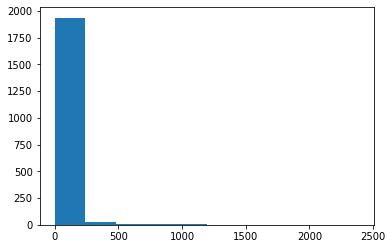

In [102]:
plt.hist(nfl_end_of_game3.total_precip)

(array([736., 893., 270.,  62.,  15.,   3.,   2.,   0.,   0.,   1.]),
 array([ 0.3 ,  1.27,  2.24,  3.21,  4.18,  5.15,  6.12,  7.09,  8.06,
         9.03, 10.  ]),
 <a list of 10 Patch objects>)

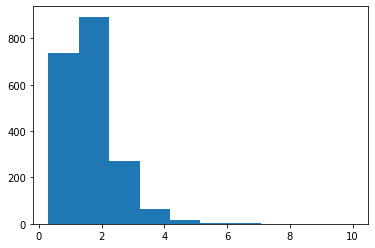

In [106]:
plt.hist(nfl_end_of_game3.pass_run_ratio)

In [287]:
total_precip = nfl_end_of_game3[(nfl_end_of_game3['total_precip']!=0) & \
                                (nfl_end_of_game3['Roof_x']=='Open')]['total_precip']
total_precip.count()

218

In [292]:
cum_precip = pd.DataFrame(nfl_end_of_game3[(nfl_end_of_game3['total_precip']!=0)&\
                             (nfl_end_of_game3['Roof_x']=='Open')]\
                             .sort_values(by=['total_precip'],ascending=True)\
                             .groupby('total_precip')['total_precip'].count().cumsum()/218)

In [302]:
# Given highly skewed precip values, buckets will be fairly skewed
x = cum_precip['total_precip'].index
y = cum_precip['total_precip'].values

fig = go.Figure()

fig.add_trace(go.Scatter(name='Count of Records',
                 x=x, 
                 y=y)
             )

fig

In [303]:
nfl_end_of_game3[nfl_end_of_game3['total_precip']!=0].total_precip

0        25.650000
5        87.362500
6         4.200000
34      134.142857
47      119.400000
           ...    
1965      0.800000
1966     34.100000
1970     29.000000
1977    236.800000
1978     42.500000
Name: total_precip, Length: 218, dtype: float64

In [304]:
#Bucket 1 >0 and <= 38
cum_precip[cum_precip['total_precip'] <= .41].tail(5)

,total_precip
total_precip,
37.20,0.366972
37.25,0.376147
37.80,0.385321
38.00,0.394495
38.35,0.403670


In [305]:
#Bucket 2 >38 and <= 180
cum_precip[(cum_precip['total_precip'] > .4)&(cum_precip['total_precip'] < .81)].tail(5)

,total_precip
total_precip,
159.733333,0.770642
163.200000,0.779817
165.650000,0.788991
172.200000,0.798165
188.900000,0.807339


In [306]:
#Bucket 3 >180 and <= 180
cum_precip[(cum_precip['total_precip'] > .8)].tail(5)

,total_precip
total_precip,
741.6,0.963303
973.5,0.972477
1130.4,0.981651
1594.2,0.990826
1874.1,1.000000


In [307]:
cum_precip[cum_precip['total_precip'] <= .41].count(),\
cum_precip[(cum_precip['total_precip'] > .4)&(cum_precip['total_precip'] < .8)].count(),\
cum_precip[(cum_precip['total_precip'] > .8)].count()

(total_precip    43
 dtype: int64, total_precip    43
 dtype: int64, total_precip    22
 dtype: int64)

In [308]:
bins = [-1,0, 38, 180, 2000]
labels = ['No Precip','38 mm or Less', 'Between 39 and 180 mm','>180 mm']
nfl_end_of_game3['precip_bins'] = pd.cut(nfl_end_of_game3['total_precip'], bins=bins, labels=labels)

In [309]:
nfl_end_of_game3[['precip_bins','total_precip']].head(10)

,precip_bins,total_precip
0,38 mm or Less,25.6500
1,No Precip,0.0000
2,No Precip,0.0000
3,No Precip,0.0000
4,No Precip,0.0000
5,Between 39 and 180 mm,87.3625
6,38 mm or Less,4.2000
7,No Precip,0.0000
8,No Precip,0.0000
9,No Precip,0.0000


In [310]:
nfl_end_of_game3[(nfl_end_of_game3['total_precip']!=0) & (nfl_end_of_game3['Roof_x']=='Open')]\
                 [['precip_bins','total_precip']].head(10)

,precip_bins,total_precip
0,38 mm or Less,25.650000
5,Between 39 and 180 mm,87.362500
6,38 mm or Less,4.200000
34,Between 39 and 180 mm,134.142857
47,Between 39 and 180 mm,119.400000
55,>180 mm,397.733333
80,38 mm or Less,27.000000
82,38 mm or Less,29.700000
86,38 mm or Less,11.000000
100,38 mm or Less,8.100000


In [311]:
nfl_end_of_game3.groupby('precip_bins').agg({'pass_run_ratio':'mean'})

,pass_run_ratio
precip_bins,
No Precip,1.163464
38 mm or Less,1.586279
Between 39 and 180 mm,1.544773
>180 mm,1.522273


In [313]:
x = nfl_end_of_game3.groupby('precip_bins')['pass_run_ratio'].mean().index
y = nfl_end_of_game3.groupby('precip_bins')['pass_run_ratio'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='Pass/Run Ratio',x=x, y=y)
             )

fig.update_layout(
    title={
        'text':'<b>'+'Affects of Rains on Pass/Runn Ratio'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_yaxes(range=[.5, 1.7])

fig

We see some marginal differences in Pass/Run Ratio for games with precipitation, but sample size is very low. Should we just create a precip flag?

(array([230.,  24.,   6.,   4.,   4.,   2.,   2.,   2.,   0.,   2.]),
 array([6.00000e-01, 2.39560e+02, 4.78520e+02, 7.17480e+02, 9.56440e+02,
        1.19540e+03, 1.43436e+03, 1.67332e+03, 1.91228e+03, 2.15124e+03,
        2.39020e+03]),
 <a list of 10 Patch objects>)

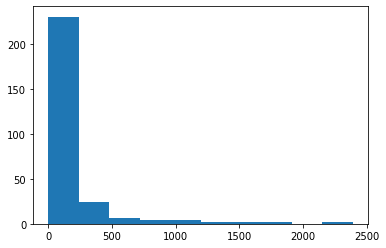

In [147]:
plt.hist(nfl_end_of_game3[nfl_end_of_game3['total_precip']!=0].total_precip)

In [141]:
x = nfl_end_of_game3.groupby('total_precip')['pass_run_ratio'].mean().index
y = nfl_end_of_game3.groupby('total_precip')['pass_run_ratio'].mean().values

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=x, y=y),secondary_y=False)

fig.add_trace(go.Scatter(name='Count of Records',
                 x=x, 
                 y=nfl_end_of_game3.groupby('total_precip')['pass_run_ratio'].count().values,yaxis='y2'),
                 secondary_y=True
             )

fig

In [105]:
x = nfl_end_of_game3.total_precip
y = nfl_end_of_game3.pass_run_ratio

fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

fig

In [107]:
nfl_end_of_game3[nfl_end_of_game3['pass_run_ratio'] > 5]

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Field_x,Roof_x,Field_y,Roof_y,average_air_pressure,avg_dew_point,avg_humidity,total_precip,avg_wind_speed
95,2015102503,NE,NYJ,30,23,343.0,386.0,9.0,29.0,57.0,41.0,2.0,1.0,3.0,3.0,3.0,3.0,337.0,283.0,16.0,89.0,1.0,6.33,-43.0,-1.0,1.0,1.0,5.912281,1.777778,6.902439,3.068966,2015,10+ Wins,NaN,FieldTurf CORE,Open,FieldTurf CORE,Open,1015.346328,11.825424,77.864407,0.0,18.866102
471,2016121806,MIN,IND,6,34,302.0,418.0,9.0,40.0,47.0,28.0,5.0,0.0,2.0,2.0,2.0,2.0,248.0,250.0,34.0,161.0,0.0,5.22,-116.0,-5.0,1.0,1.0,5.276596,3.777778,8.928571,4.025000,2016,Between 6 and 9,NaN,UBU Speed Series S5-M Synthetic Turf,Fixed,UBU Speed Series S5-M Synthetic Turf,Fixed,1035.269565,-28.440994,64.055901,0.0,10.327950
807,2018092307,MIN,BUF,6,27,312.0,261.0,6.0,38.0,60.0,25.0,8.0,4.0,0.0,0.0,2.0,2.0,278.0,164.0,14.0,128.0,0.0,10.00,51.0,-4.0,0.5,1.0,4.633333,2.333333,6.560000,3.368421,2018,Between 6 and 9,NaN,UBU Speed Series S5-M Synthetic Turf,Fixed,UBU Speed Series S5-M Synthetic Turf,Fixed,1013.915476,11.146429,45.357143,0.0,20.680357
1009,2015092001,NE,BUF,40,32,489.0,355.0,12.0,28.0,61.0,39.0,4.0,7.0,4.0,4.0,0.0,0.0,451.0,189.0,60.0,160.0,1.0,5.08,134.0,3.0,1.0,0.5,7.393443,5.000000,4.846154,5.714286,2015,10+ Wins,NaN,A-Turf Titan 50,Open,A-Turf Titan 50,Open,1022.001990,6.569154,45.885572,0.0,13.626866
1159,2015112905,MIA,NYJ,20,38,296.0,386.0,9.0,33.0,61.0,38.0,5.0,1.0,0.0,0.0,1.0,1.0,321.0,274.0,12.0,138.0,0.0,6.78,-90.0,-4.0,0.5,1.0,5.262295,1.333333,7.210526,4.181818,2015,5 or Less,NaN,UBU Sports Speed Series S5-M Synthetic Turf,Open,UBU Sports Speed Series S5-M Synthetic Turf,Open,1023.148718,-5.861026,35.041026,0.0,9.741538
1364,2016103009,ARI,CAR,20,29,280.0,324.0,10.0,36.0,54.0,28.0,5.0,1.0,0.0,0.0,3.0,3.0,316.0,208.0,24.0,141.0,0.0,5.40,-44.0,-4.0,0.5,1.0,5.851852,2.400000,7.428571,3.916667,2016,5 or Less,NaN,Bermuda grass,Open,Bermuda grass,Open,1017.859659,11.364205,36.943182,0.0,10.862500
1448,2016121109,DEN,TEN,10,13,313.0,233.0,9.0,39.0,55.0,22.0,4.0,1.0,1.0,1.0,2.0,2.0,330.0,73.0,18.0,183.0,0.0,6.11,80.0,-3.0,1.0,1.0,6.000000,2.000000,3.318182,4.692308,2016,Between 6 and 9,NaN,Bermuda grass,Open,Bermuda grass,Open,1020.157738,-7.326190,24.940476,0.0,32.972619


<h2>Graveyard</h2>

In [74]:
fig = go.Figure(data=[go.Bar(name='Avg Wins', x = team_by_wins['team'], y = team_by_wins['wins']/4),\
                     go.Bar(name='Avg Wins', x = team_by_wins['team'], y = np.repeat(.1,32))])

layout = go.Layout(
    title = 'Average Wins By Team (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Team'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},barmode='stack',
        shapes=[{'type': 'line','y0':7,'y1': 7,'x0':'CLE', 
                              'x1':'CLE','xref':'x1','yref':'y1',
                              'line': {'color': 'red','width': 2.5}}])
fig

I want this to be average wins over four years, with year totals plotted as lines